In [37]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import linear_model
import seaborn as sns
from sklearn import preprocessing

In [2]:
users=pd.read_csv("/Users/alok.g.v/Desktop/python practice/Guvi Task/Task 5/takehome_users.csv")
engagement=pd.read_csv("/Users/alok.g.v/Desktop/python practice/Guvi Task/Task 5/takehome_user_engagement.csv")

In [3]:
users.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
len(users['object_id'].unique())

12000

In [6]:
engagement.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
print("There are {} unique users in 207917 entries in the engagement dataset"\
      .format(len(engagement['user_id'].unique())))

There are 8823 unique users in 207917 entries in the engagement dataset


In [9]:
df1=users['creation_source'].value_counts()
df1=pd.DataFrame(df1)

In [10]:
df1=df1.reset_index()


In [11]:
df1.rename(columns={'index':'sign up'},inplace=True)
df1


,sign up,creation_source
0,ORG_INVITE,4254
1,GUEST_INVITE,2163
2,PERSONAL_PROJECTS,2111
3,SIGNUP,2087
4,SIGNUP_GOOGLE_AUTH,1385


<AxesSubplot:xlabel='sign up', ylabel='creation_source'>

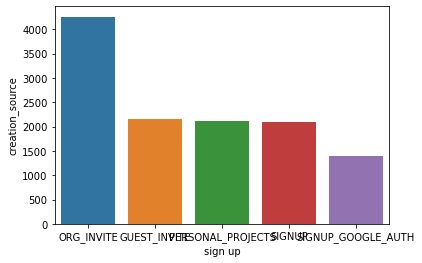

In [12]:
sns.barplot(x='sign up',y='creation_source',data=df1)

In [13]:
#checking how many users were not invited to join
count=0
for i in range(len(users)):
    if users["invited_by_user_id"][i]>=1:
        count+=1

print("Numbers of users who were invited to join out of 12000 is ",count)

Numbers of users who were invited to join out of 12000 is  6417


In [14]:
#Narrowing down users who logged in 3 times
three_logins=engagement.groupby('user_id').filter(lambda x: len(x)>=3)
print('There are {} number of unique users who logged in 3 times or more'\
     .format(len(three_logins['user_id'].unique())))
three_logins

There are 2248 number of unique users who logged in 3 times or more


,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
...,...,...,...
207905,2014-04-20 14:22:45,11991,1
207906,2014-04-25 14:22:45,11991,1
207907,2014-04-28 14:22:45,11991,1
207908,2014-05-17 14:22:45,11991,1


In [23]:
#remove index from three logins data
three_logins.reset_index(drop=True,inplace=True)

#Finding the Adopted Users
#people who have logged in Three days in a week
Ad=0
Adopted=[]

for i in range(len(three_logins)-2):
    user=three_logins['user_id'][i]
    if user!=Ad and user==three_logins['user_id'][i+2]:
        #login data
        entry=pd.Timestamp(three_logins['time_stamp'][i])
        #7 day time stamp
        exit=entry+pd.Timedelta('7D')
        if entry<pd.Timestamp(three_logins['time_stamp'][i+1])<exit and entry<pd.Timestamp(three_logins['time_stamp'][i+2])<exit:
            Adopted.append(user)
            Ad=user

print("Number of adopted users",len(Adopted))


Number of adopted users 1602


In [27]:
#Encoding Adopted data ,1 : Adopted User ,0 : Non Adopted User 

y=pd.Series(np.random.rand(len(users)))
n=0
for i in range(len(users)):
    if int(users['object_id'][i])==Adopted[n]:
        y[i]=1
        n=n+1
        if n>len(Adopted)-1:
            n=n-1
    else:
        y[i]=0
y

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
11995    0.0
11996    0.0
11997    0.0
11998    0.0
11999    0.0
Length: 12000, dtype: float64

In [31]:
#adding Encoded Adopted user data into the original dataset
df2=pd.DataFrame(y,columns=["Adopted_user"])
users2=pd.concat([users,df2],axis=1)
users2.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [32]:
#Encoding whether the user was invited or not 
#1 : for invited , 0 : not invited 
x=pd.Series(np.random.randn(len(users)))

for i in range(len(users)):
    if users['invited_by_user_id'][i]>=1:
        x[i]=1
    else:
        x[i]=0
x

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11995    1.0
11996    0.0
11997    1.0
11998    0.0
11999    0.0
Length: 12000, dtype: float64

In [35]:
#adding the encoded invited data to original data
df3=pd.DataFrame(x,columns=['invited'])
users3=pd.concat([users2,df3],axis=1)
users3

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_user,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0,1.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0.0,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0,1.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0.0,0.0


In [62]:
creation=pd.get_dummies(users4.creation_source)
creation

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
11995,0,1,0,0,0
11996,0,0,0,0,1
11997,1,0,0,0,0
11998,0,0,1,0,0


In [63]:
users4=pd.concat([users3,creation],axis=1)
users4

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_user,invited,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,1.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,1.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0,1.0,0,1,0,0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0.0,0.0,0,0,0,0,1
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0,1.0,1,0,0,0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0.0,0.0,0,0,1,0,0


In [66]:
users4.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
Adopted_user                     0
invited                          0
GUEST_INVITE                     0
ORG_INVITE                       0
PERSONAL_PROJECTS                0
SIGNUP                           0
SIGNUP_GOOGLE_AUTH               0
dtype: int64

In [55]:
from sklearn.linear_model import LogisticRegression

In [67]:
model=LogisticRegression()
X=users4[['opted_in_to_mailing_list','enabled_for_marketing_drip','invited','GUEST_INVITE','ORG_INVITE','PERSONAL_PROJECTS','SIGNUP','SIGNUP_GOOGLE_AUTH']]
y=users4['Adopted_user']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
y_pred=model.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8623333333333333